# PCA

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
 
Link to the case file: 
vehicle.csv 
 
The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)


# Import Libraries

In [107]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import pca
from scipy.stats import zscore

In [108]:
# Read the dataset
vehicle_df = pd.read_csv("vehicle.csv") 
vehicle_df.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [109]:
#Dataframe dimensions
vehicle_df.shape

(846, 19)

In [110]:
#Dropping the duplicates
vehicle_df = vehicle_df.drop_duplicates()

In [25]:
# Check if any null values.
vehicle_df.isnull().values.any()

True

In [28]:
# Check missing value details
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [33]:
vehicle_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


By looking at the above table you can see we might have outliers in radius_ratio, pr.axis_aspect_ratio,max.length_aspect_ratio,
scaled_radius_of_gyration, scaled_radius_of_gyration.1 and skewness_about

We will verify this with boxplot



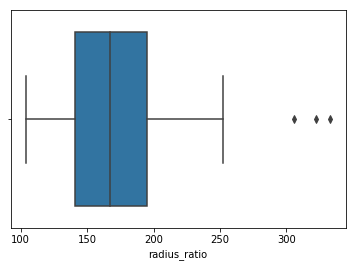

In [223]:
sns.boxplot(x='radius_ratio',data=vehicle_df)

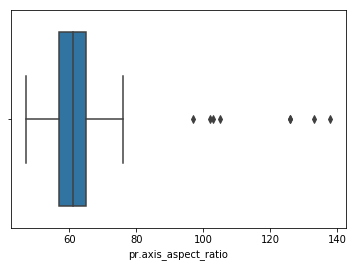

In [224]:
sns.boxplot(x='pr.axis_aspect_ratio',data=vehicle_df)

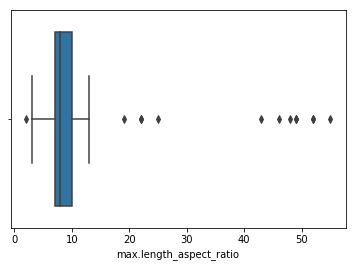

In [225]:
sns.boxplot(x='max.length_aspect_ratio',data=vehicle_df)

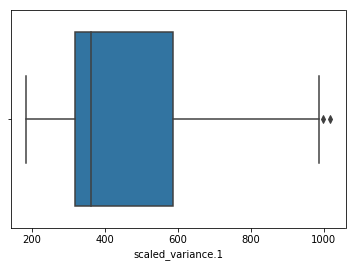

In [230]:
sns.boxplot(x='scaled_variance.1',data=vehicle_df)

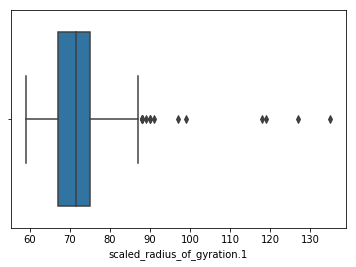

In [231]:
sns.boxplot(x='scaled_radius_of_gyration.1',data=vehicle_df)

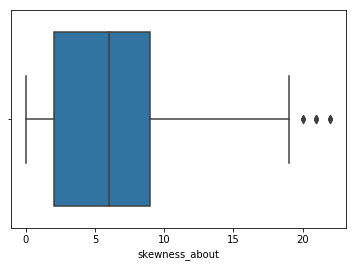

In [232]:
sns.boxplot(x='skewness_about',data=vehicle_df)

In [233]:
#Split independent variables and target variable in X and y

#Independent Variables

X = vehicle_df.drop('class',axis=1)
#assigning target column to y as we always do PCA on independent variables
y = vehicle_df["class"]
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [234]:
X = X.apply(lambda x: x.fillna(x.median()),axis=0)

In [235]:
X.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [236]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 845
Data columns (total 18 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

# Observations

Visually inspect the covariance between independent dimensions and see below mentioned dimensions are weakly related

pr.axis_aspect_ratio

max.length_aspect_ratio


skewness_about

skewness_about.1



and these weak related dimensions will be not be useful in PCA so we will drop these and consider other columns where we have strong relationship.

In [237]:
# We transform selected variables from X (independent variable data) to zscores through transformation. 
#We will create the PCA dimensions on this distribution. 
sc = StandardScaler()
drop_clm =['pr.axis_aspect_ratio','max.length_aspect_ratio','skewness_about','skewness_about.1']
X = X.drop(drop_clm,axis=1)
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.81358214 -0.78968322
   0.81465658  0.67694334  0.76297234  0.81497566  0.58593517 -0.24988794
   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.8489411  -0.82244387
   0.84439802  0.96245572  0.79724837  0.83693508  0.92691166  0.05200785
  -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.90614687 -0.9123854
   0.89408198  0.77544391  0.86253904  0.88706577  0.70660663 -0.22621115
   0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.73529816 -0.79041561
   0.70922371  0.56962256  0.79435372  0.71928618  0.53700678 -0.18061084
   0.38266622  0.47186659]
 [ 0.81358214  0.8489411   0.90614687  0.73529816  1.00118343 -0.97275069
   0.99092181  0.81004084  0.94978498  0.9941867   0.80082111 -0.02757446
   0.00563439  0.1189581 ]
 [-0.78968322 -0.82244387 -0.9123854  -0.79041561 -0.97275069  1.00118343
  -0.95011894 -0.77677186 -0.9

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [238]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.27873099 -0.13966655  0.05471764  0.25243224 -0.79760343 -0.2443679
  -0.31951746  0.09296228 -0.01573371  0.16370925 -0.01494629  0.00710635
  -0.04607234  0.00459562]
 [-0.29747337  0.11503295 -0.41223163 -0.23099617 -0.0365487   0.02516489
  -0.01450527 -0.18026707 -0.15146771 -0.02970684 -0.0084682  -0.08598246
  -0.05484776  0.77846595]
 [-0.30700143 -0.08032732 -0.01011152  0.14567082  0.32389181 -0.44978654
   0.00822329  0.5892383  -0.32927523 -0.18017919 -0.00485113  0.03143887
   0.28104658  0.05105247]
 [-0.262844   -0.18007037  0.37431096 -0.53968489  0.179397   -0.22807211
  -0.48663283 -0.34267751  0.02490818 -0.08157221  0.00178964  0.02776935
   0.1068054  -0.09603897]
 [-0.32212081  0.04004412  0.11604884  0.21257194  0.07465676  0.1002724
   0.11951534 -0.14204652  0.12415872  0.04728884  0.84145688  0.22935197
   0.08129096  0.03129417]
 [ 0.31835533  0.02113939 -0.14072208 -0.09883856 -0.21227572 -0.18049749
  -0.11394827  0.09943069  0.273176

In [239]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.235067900231343, array([-0.27873099, -0.29747337, -0.30700143, -0.262844  , -0.32212081,
        0.31835533, -0.31913803, -0.28635028, -0.3111114 , -0.31917111,
       -0.27689803,  0.02417122, -0.02733335, -0.06971296])), (2.9391482888477087, array([-0.13966655,  0.11503295, -0.08032732, -0.18007037,  0.04004412,
        0.02113939,  0.05171388,  0.10484281,  0.06234353,  0.04518395,
        0.20159464,  0.51284026, -0.55042981, -0.54783145])), (0.6128106191468402, array([ 0.05471764, -0.41223163, -0.01011152,  0.37431096,  0.11604884,
       -0.14072208,  0.09684811, -0.48821135,  0.33163302,  0.1336447 ,
       -0.33516076,  0.3840107 ,  0.08559018, -0.10438497])), (0.42911020066160255, array([ 0.25243224, -0.23099617,  0.14567082, -0.53968489,  0.21257194,
       -0.09883856,  0.25115651, -0.20977705, -0.06497474,  0.23472724,
       -0.24642631, -0.43458957, -0.22611173, -0.21990438])), (0.271705637861001, array([-0.79760343, -0.0365487 ,  0.32389181,  0.179397  ,  0.07465676,

In [240]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
cum_var_exp = np.cumsum(var_explained)  


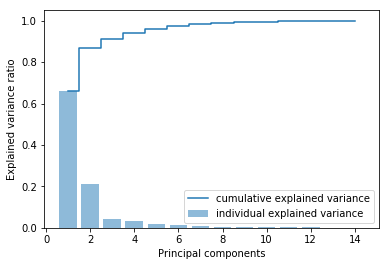

In [241]:
plt.bar(range(1,15), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,15),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [242]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:10])   # Reducing from 18 to 10 dimension space

X_std_11D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_11D)  # converting array to dataframe for pairplot

In [243]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

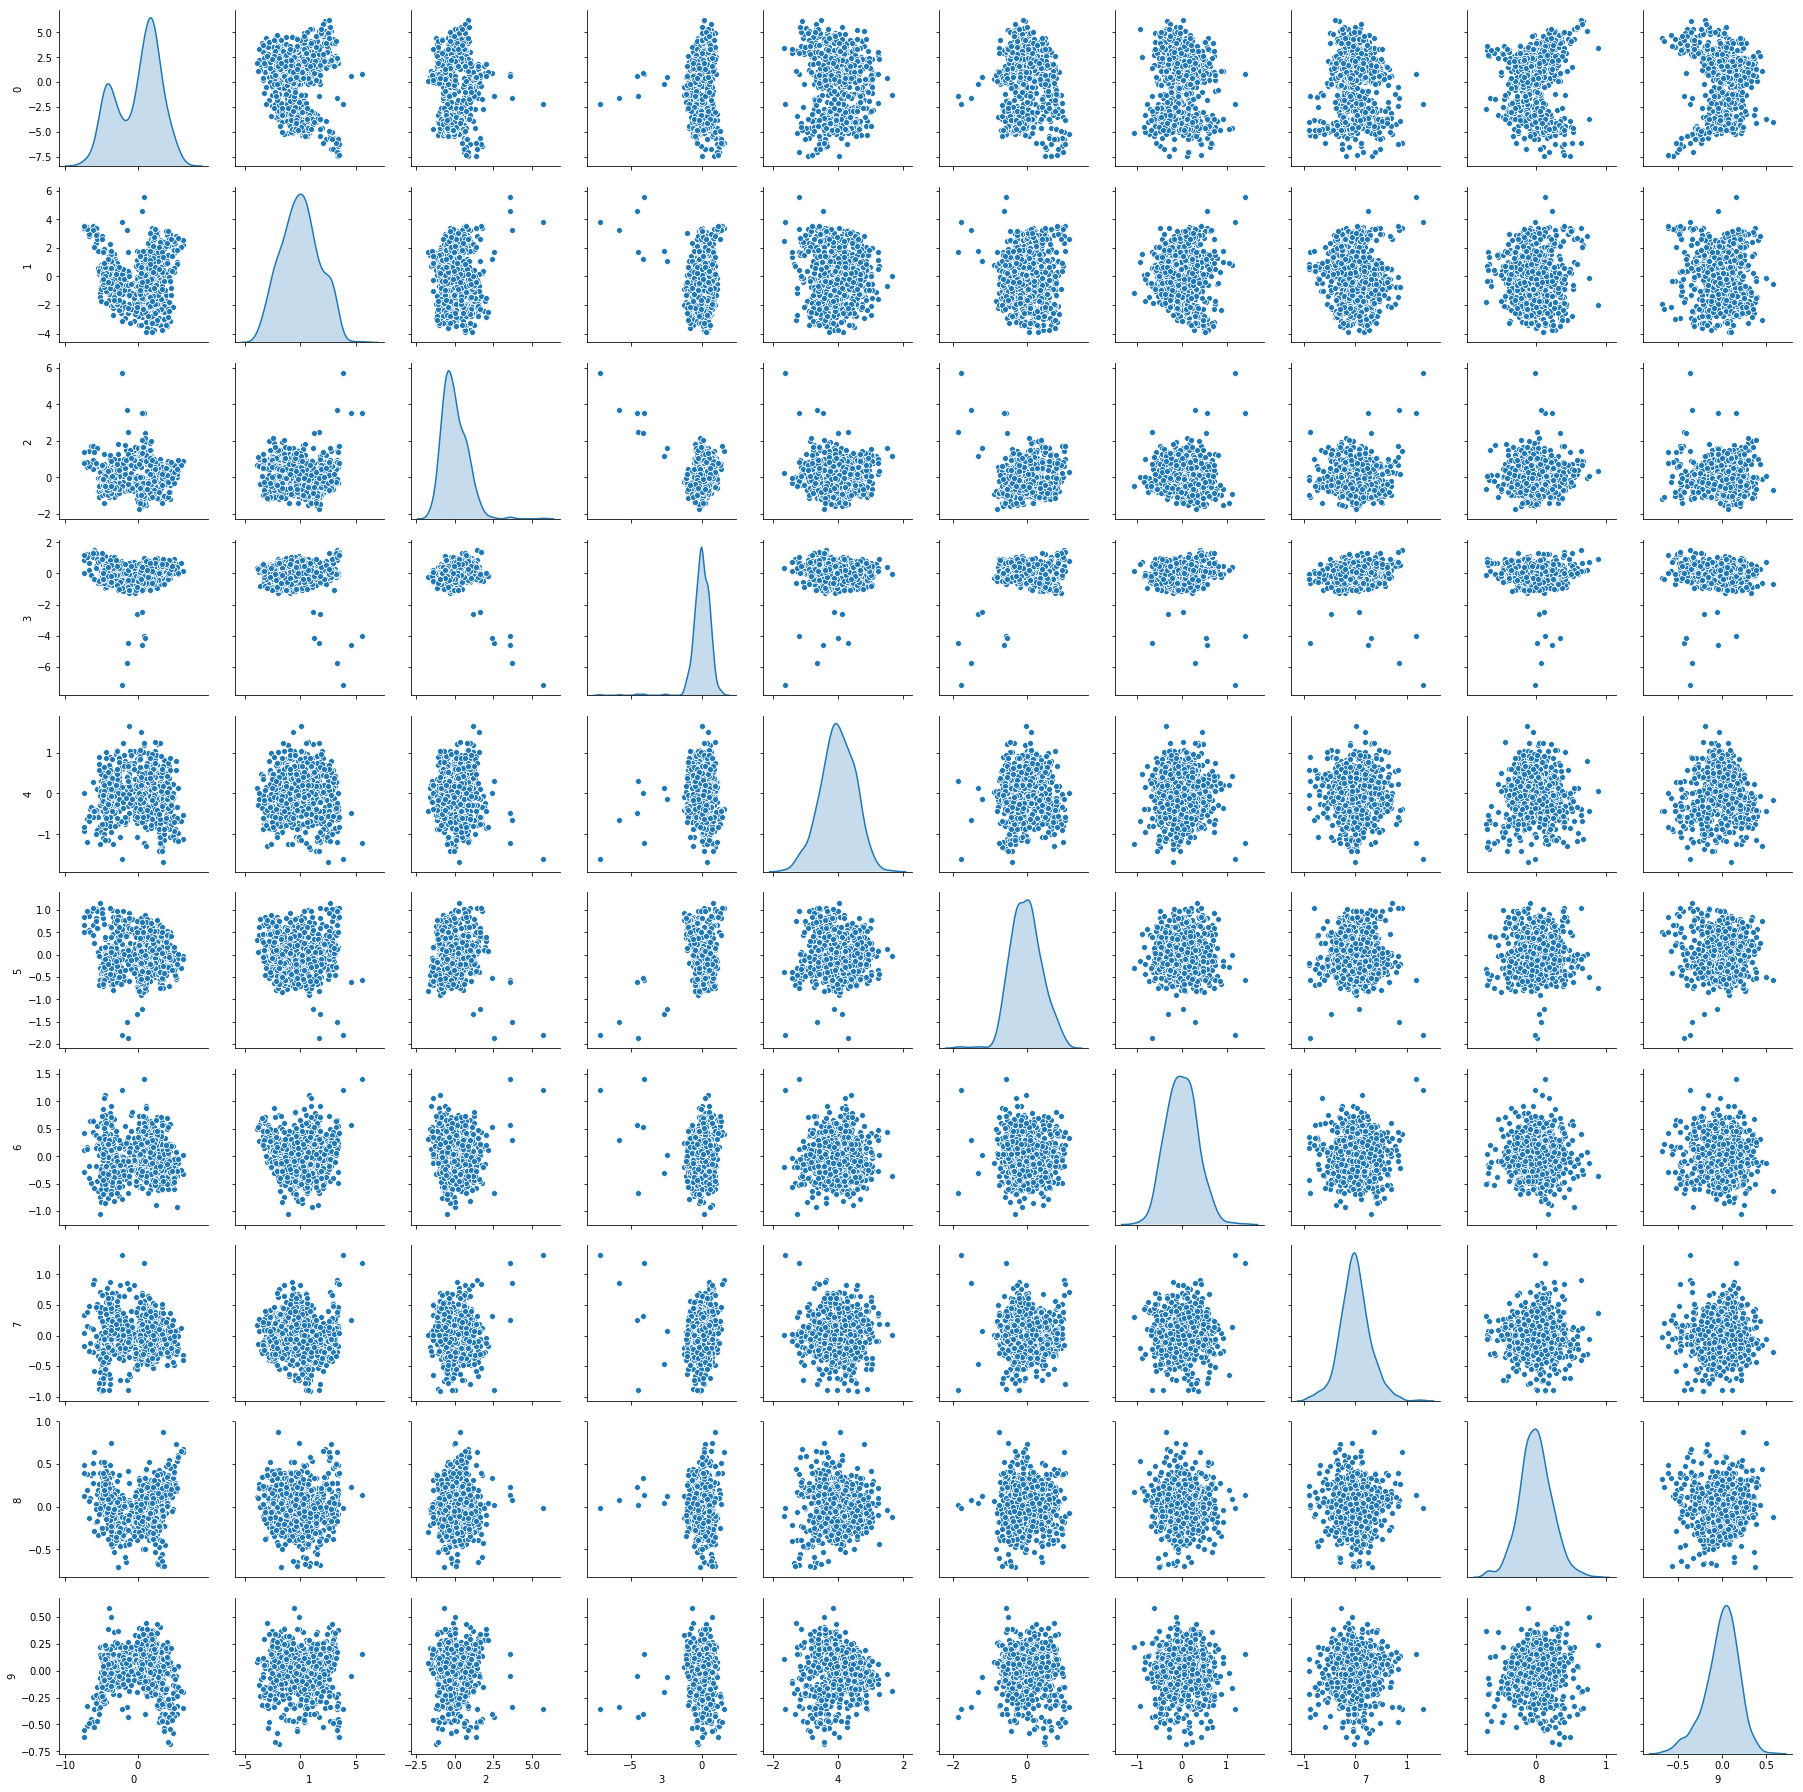

In [244]:
#Let us check it visually

sns.pairplot(Proj_data_df, diag_kind='kde') 

In [245]:
from sklearn import svm
from sklearn.metrics import accuracy_score

def getAccuracyScore(cVal,k):
    clf = svm.SVC(gamma=0.025, C=cVal, kernel=k)    
    # gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
    # lower C value creates simple hyper surface while higher C creates complex surface
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test , y_pred)
    return score


In [246]:
getAccuracyScore(0.01,'linear')

0.8070866141732284

In [247]:
getAccuracyScore(0.01,'rbf')

0.5

In [248]:
getAccuracyScore(0.05,'linear')

0.8661417322834646

In [250]:
getAccuracyScore(0.05,'rbf')

0.5

In [251]:
getAccuracyScore(0.5,'linear')

0.8858267716535433

In [205]:
getAccuracyScore(0.5,'rbf')

0.905511811023622

In [252]:
getAccuracyScore(1,'linear')

0.8818897637795275

In [253]:
getAccuracyScore(1,'rbf')

0.905511811023622

We have high accuracy with C=1 and kernel='rbf'

In [254]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [255]:
#Build the model using Gaussian Naive bayes.
model = GaussianNB()
model.fit(X_train, y_train)

#validate on test set.
predicted = model.predict(X_test)

#Accuracy score
score = metrics.accuracy_score(y_test, predicted,normalize=True, sample_weight=None)
print("Accuracy score : {0} %".format(round(score*100,3)))

Accuracy score : 79.528 %
